# Занятие 3. Эффект наложения спектров при дискретизации сигналов.

In [14]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

from my_lib import *

def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res)) 

## Задача 3.1. Эффект наложения при дискретизации прямоугольного импульса

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Рассмотреть прямоугольный импульс длительностью $1.05\tau$. Дискретизовать его с частотой $f_s  = 10/ \tau $.  Построить спектр прямоугольного импульса и полученного дискретизованного сигнала. 

Пронаблюдать наложение спектра при дискретизации. 

Найти сигнал,  который дискретизуется такой же последовательностью, как и прямоугольный импульс, но при этом не наблюдается эффект наложения (сигнал, который восстанавливается с помощью интерполяционного ряда Котельникова).

/tmp/ipykernel_95403/2745743662.py:33: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')
/home/pavel/workfile/MIPT/RT/lab1/my_lib.py:49: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


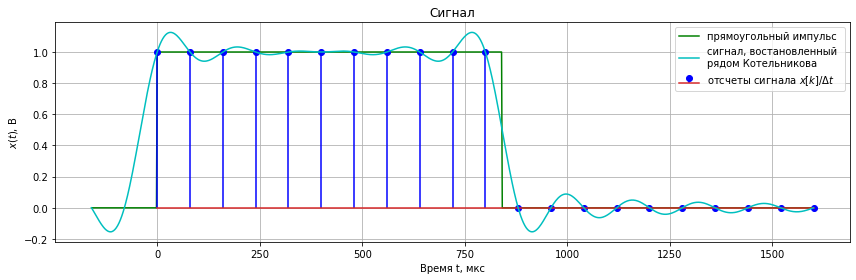

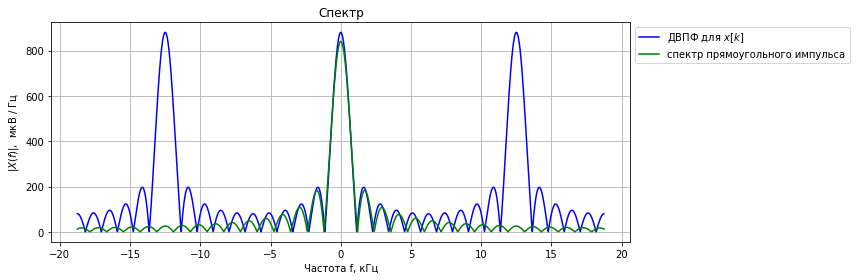

In [15]:
tau=800*1e-6 #800 мкс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0 
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0 
    else:
        return 0.0 

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))
    
def sinc_interp(t, xk):
    #print([xk*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    


tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])
    
t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[12, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

plt.figure(figsize=[12, 4])


DFTF_plot=DTFT_abs3(xk, fs)
plt.plot(DFTF_plot[0]/1e3, DFTF_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, 
         'g', label='спектр прямоугольного импульса')

plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 